In [1]:
import pandas as pd
from pathlib import Path

from src.imputer import SciPyInterpolator

In [2]:
data_path = Path("../data")
stop_it_path = data_path / "stop_it_with_code_book.xlsx"

In [3]:
stop_it = pd.read_excel(stop_it_path, sheet_name="stop_it_clean")

In [4]:
stop_it

,SDAN,Input File,Home vs InPerson,S1 vs S2,Average Run Go RT,Stop % Accuracy,Stop % Incorrect,Go % Accuracy,Go % Incorrect,Go % Omission,...,Avr_Tired,count_included,count_excluded,# of trials in Block 1,# of trials in Block 2,# of trials in Block 3,# of trials in Block 4,# of trials in Block 5,# of trials in others,TrialType
0,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,776.328418,58.490566,41.509434,88.787879,0.000000,11.212121,...,35.000000,436.0,4.0,85.0,88.0,88.0,88.0,87.0,0.0,baseline
1,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,670.172298,48.598131,51.401869,96.969697,0.303030,2.727273,...,81.000000,437.0,3.0,88.0,85.0,88.0,88.0,88.0,0.0,home1
2,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,834.039872,60.377358,39.622642,89.696970,0.303030,10.000000,...,77.666667,436.0,4.0,88.0,87.0,86.0,87.0,88.0,0.0,home2
3,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,838.702393,60.000000,40.000000,91.212121,0.000000,8.787879,...,85.000000,435.0,5.0,87.0,87.0,85.0,88.0,88.0,0.0,home3
4,rn23001,C:\Users\97254\OneDrive - mail.tau.ac.il\ \ -...,NaN,NaN,811.046650,60.000000,40.000000,94.848485,0.000000,5.151515,...,39.000000,435.0,5.0,87.0,87.0,85.0,88.0,88.0,0.0,home4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,rn23149,C:\Users\noaaa\adapt\StopSignalTask\StopSignal...,NaN,NaN,592.463913,45.283019,54.716981,98.787879,0.606061,0.606061,...,100.000000,436.0,4.0,84.0,88.0,88.0,88.0,88.0,0.0,home1
302,rn23149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home2
303,rn23149,C:\Users\noaaa\adapt\StopSignalTask\StopSignal...,NaN,NaN,519.940372,34.259259,65.740741,98.475610,1.524390,0.000000,...,90.333333,436.0,4.0,85.0,88.0,87.0,88.0,88.0,0.0,home3
304,rn23149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home4


In [4]:
col_to_remove = [
"Input File",
    "Home vs InPerson",
    "S1 vs S2"
]
stop_it = stop_it.drop(columns=col_to_remove)
stop_it.columns

Index(['SDAN', 'Average Run Go RT', 'Stop % Accuracy', 'Stop % Incorrect',
       'Go % Accuracy', 'Go % Incorrect', 'Go % Omission', 'Median Go RT',
       'Average SSD', 'SSRT', 'Post Go Error Go % Accuracy',
       'Post Go Error Go RT', 'Post Go Error Efficiency',
       'Post Any Error Go % Accuracy', 'Post Any Error Go RT',
       'Post Any Error Efficiency', 'normal_correct_percentage', 'EXCLUDE',
       'Pre_Tense', 'Pre_Angry', 'Pre_Annoyed', 'Pre_Happy', 'Pre_Tired',
       'Mid_Tense', 'Mid_Angry', 'Mid_Annoyed', 'Mid_Happy', 'Mid_Tired',
       'Post_Tense', 'Post_Angry', 'Post_Annoyed', 'Post_Happy', 'Post_Tired',
       'Avr_Tense', 'Avr_Angry', 'Avr_Annoyed', 'Avr_Happy', 'Avr_Tired',
       'count_included', 'count_excluded', '# of trials in Block 1',
       '# of trials in Block 2', '# of trials in Block 3',
       '# of trials in Block 4', '# of trials in Block 5',
       '# of trials in others', 'TrialType'],
      dtype='object')

In [5]:
feature = "SSRT"
par = "rn23049"

In [6]:
cur = (stop_it[stop_it["SDAN"] == par])
print(cur[[feature, 'Median Go RT', 'Average SSD']])

           SSRT  Median Go RT  Average SSD
120         NaN           NaN          NaN
121  416.262032    805.096984   388.834951
122         NaN           NaN          NaN
123  451.570535    801.570535   350.000000
124  421.241984    623.741984   202.500000
125         NaN           NaN          NaN


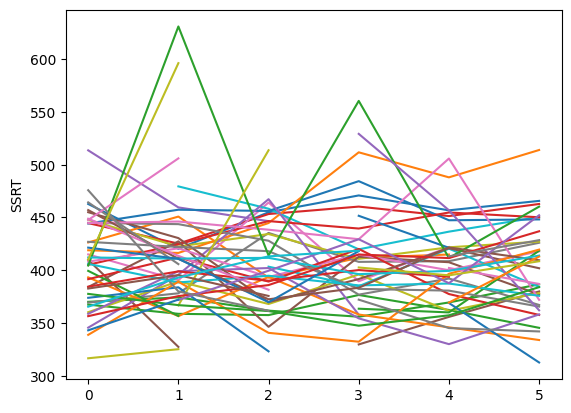

In [8]:
go_rt = stop_it[["SDAN", feature]]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for idx, group in go_rt.groupby('SDAN'):
    ax.plot(group[feature].values, label=str(idx))

ax.set_ylabel(feature)
plt.show()

In [7]:
from imputer import DataImputer

imp = DataImputer(stop_it, {feature:"linear"})
stop_it = imp.impute_and_build()

INFO:DataImputer:Imputing feature 'Median Go RT' using 'linear' interpolation.
INFO:DataImputer:Imputing feature 'Average SSD' using 'linear' interpolation.
INFO:DataImputer:Creating feature 'SSRT' using the imputed features.


In [10]:
cur = (stop_it[stop_it["SDAN"] == par])
print(cur[[feature, 'Median Go RT', 'Average SSD']])

           SSRT  Median Go RT  Average SSD
120  411.533641    767.663449   356.129808
121  416.262032    805.096984   388.834951
122  442.013026    760.835141   318.822115
123  451.570535    801.570535   350.000000
124  421.241984    623.741984   202.500000
125  404.194045    584.245503   180.051458


In [ ]:
go_rt = stop_it[["SDAN", feature]]

fig, ax = plt.subplots()

for idx, group in go_rt.groupby('SDAN'):
    ax.plot(group[feature].values, label=str(idx))

ax.set_ylabel(feature)
plt.show()

In [ ]:
(go_rt.groupby('SDAN').count())[feature].min()